# Лабораторная работа 1
### Выполнил: Баютов Александр Владимирович

Добро пожаловать в лабораторную работу!
Оформите ваше решение контеста Kaggle в соответствии с этим шаблоном. Ваша задача - показать проверяющим ход ваших рассуждений, поэтому советуем писать много комментариев к коду и приводить комментарии к логике на каждом этапе в текстовых ячейках.
Где необходимо, используйте графики для большей наглядности.

При отправке поменяйте название файла на ваши ФИО!

### EDA (исследовательский анализ данных)

В этом разделе вам необходимо провести анализ вашего датасета, интерпретировать признаки, выяснить их значимость и исследовать зависимости между ними.

In [4]:
# exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

data = pd.read_csv('train.csv', index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
id,,,,,,,,,,,,
17044,0.28,Ideal,F,VVS2,61.6,55.0,4.22,4.26,2.61,5,5,612
30625,0.28,Ideal,I,VS1,62.5,54.0,4.18,4.23,2.63,5,6,448
17043,0.28,'Very Good',F,IF,62.2,55.0,4.23,4.26,NaN,5,7,612
37947,0.28,'Very Good',E,VS2,63.0,59.0,4.11,4.15,2.60,5,8,487
30626,0.28,Ideal,I,VS1,62.4,54.0,4.18,4.19,2.61,5,9,448


In [5]:
data.describe()



,carat,depth,table,x,y,z,theta1,theta2,price
count,40453.00000,40396.000000,40453.000000,40405.000000,40393.000000,40411.000000,40453.000000,40453.000000,40453.000000
mean,0.77475,61.755897,57.438563,5.704927,18.773722,3.523399,19.071738,19.036190,3736.247003
std,0.41728,1.425065,2.225439,1.033411,350.627591,0.656404,8.527417,8.570144,3615.804536
min,0.28000,43.000000,43.000000,0.000000,0.000000,0.000000,5.000000,5.000000,334.000000
25%,0.40000,61.100000,56.000000,4.740000,4.750000,2.930000,11.000000,11.000000,979.000000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.520000,19.000000,19.000000,2401.000000
75%,1.03000,62.500000,59.000000,6.510000,6.510000,4.020000,27.000000,27.000000,5154.000000
max,2.02000,79.000000,79.000000,8.800000,9428.922353,31.800000,33.000000,33.000000,18803.000000


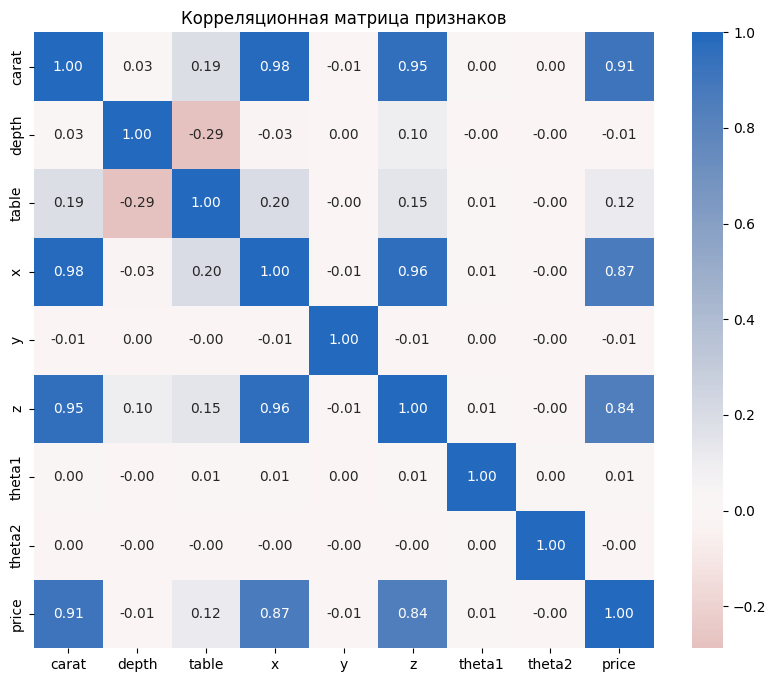

In [6]:

plt.figure(figsize=[10, 8])
sns.heatmap(data[['carat', 'depth', 'table', 'x', 'y', 'z', 'theta1', 'theta2', 'price']].corr(), annot = True, fmt='.2f', cmap = 'vlag_r', center = 0)
plt.title('Корреляционная матрица признаков')
plt.show()


Самая большая корреляция с x, z, carat, но не с y, скорее всего из-за выбросов.

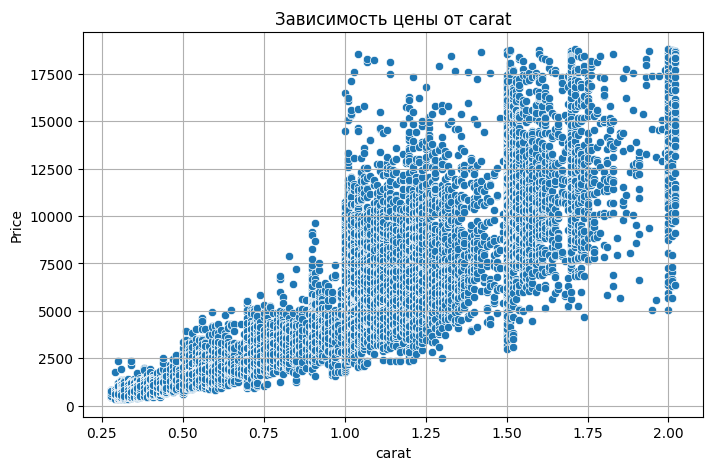

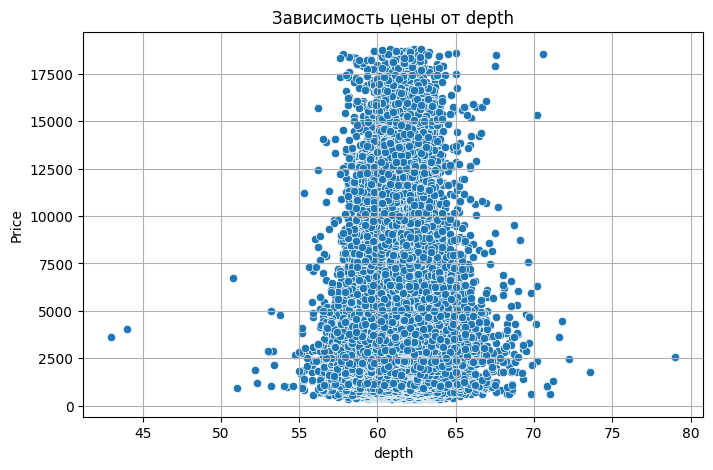

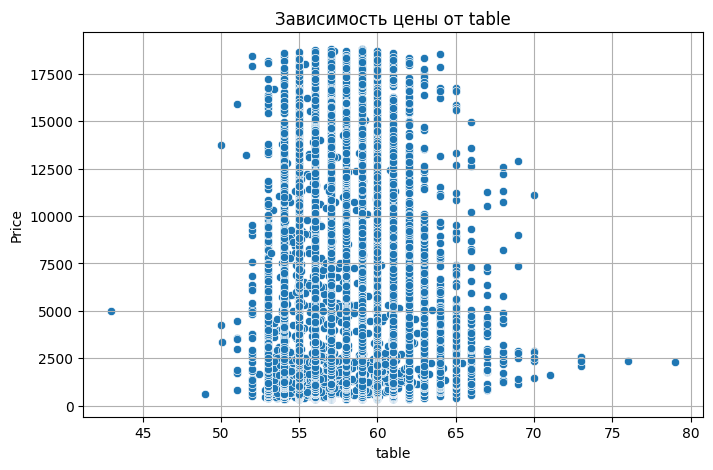

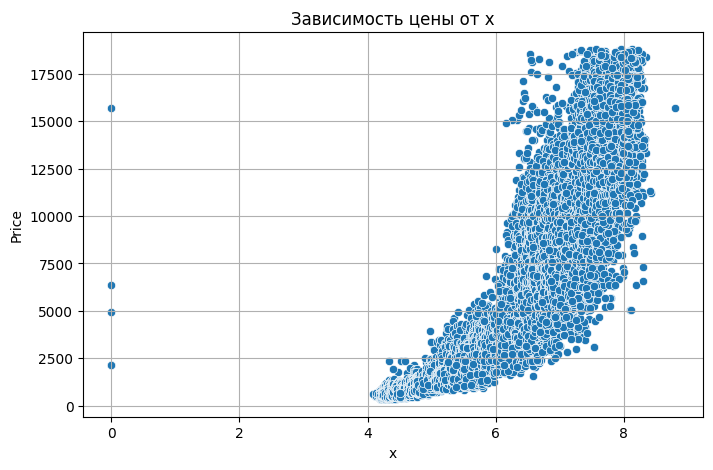

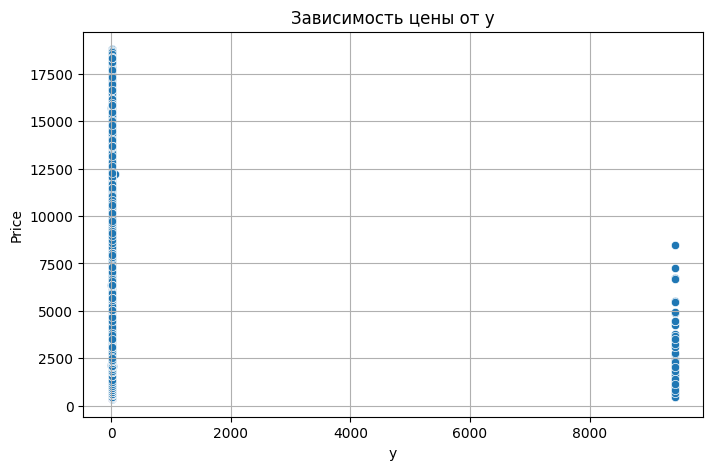

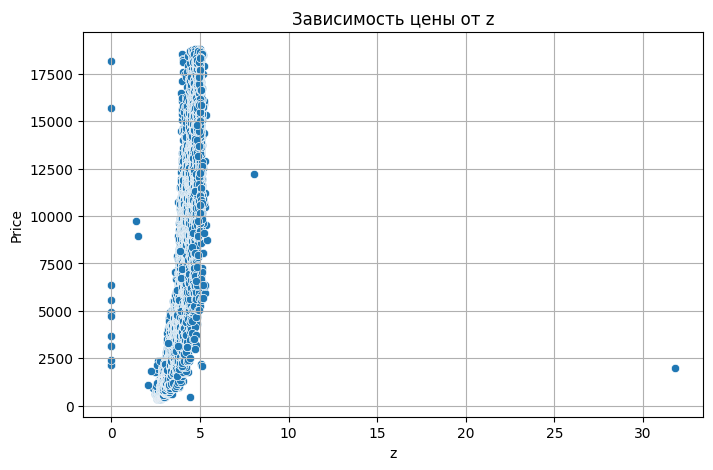

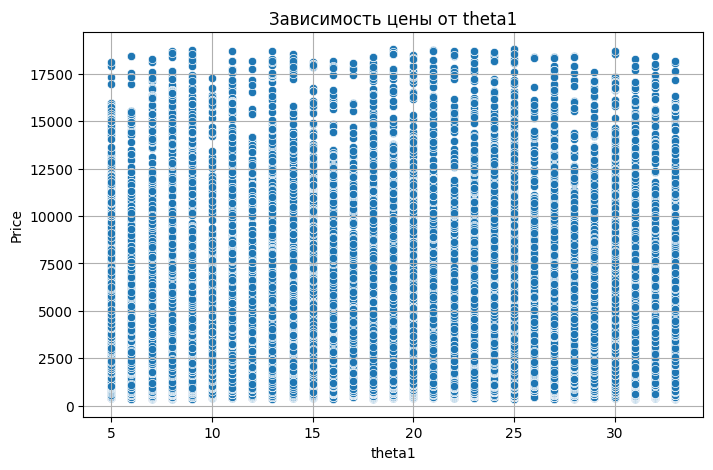

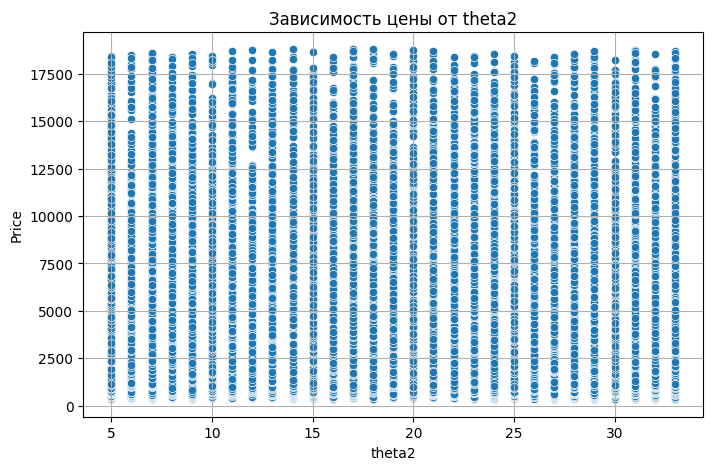

In [7]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'theta1', 'theta2']
for feature in features:
  plt.figure(figsize=(8, 5))
  sns.scatterplot(x=data[feature], y=data['price'])
  plt.title(f'Зависимость цены от {feature}')
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.grid(True)
  plt.show()

Рассмотрим зависимость цены от признаков: по x видны выбросы около 0, по y около 8000, по z около 30. Зависимость от карата выглядит линейной, от table и death нормальной, от theta1, theta2 равномерной

### Preprocessing (подготовка данных)

 В этом разделе вам необходимо реализовать подготовку ваших данных, в том числе заполнение пропусков, фильтрацию выбросов, кодирование категориальных признаков и т.д. В этот же раздел включите любые операции над данными, которые сочтете нужными.

In [8]:
# preprocessing pipeline
# убираем выбросы по x, y, и нулевые значения, т.к. их тоже быть не должно по логике
data = data[data['x'] > 0]
data = data[data['y'] > 0]
data = data[data['z'] > 0]
data = data[data['y'] <= 10]
data = data[data['z'] <= 8]
data.isna().sum()

,0
carat,0
cut,0
color,0
clarity,64
depth,57
table,0
x,0
y,0
z,0
theta1,0


NaN'ов очень мало по сравнению с размером датасета, так что их можно просто выбросить. Также заменим категориальные признаки на n-1 столбцов типа bool, чтобы линейная регрессия могла работать с ними

In [9]:
data = data.dropna()
data = pd.get_dummies(data, columns=["cut", "color", "clarity"], drop_first=True)

На этом первичная обработка данных завершена, первый эксперимент я проводил на таких данных. А для второго добавил ещё несколько признаков:

1.   volume - объём
2.   p - периметр
3. area - площадь параллелипипеда
4. form - отношение высоты к площади основания
5. pl - аналог плотности. Плотность у алмазов примерно равно, но они все не ровно параллелипипеды
6. area1 - площадь 1 стороны
7. area2 - площадь 2 стороны
8. area3 - площадь 3 стороны
9. caratx - не имеет логического обоснования, просто добавил и получил немного лучший результат, так что оставил
10. caraty - аналогично caratx  
11. caratz - аналогично caratx  

In [10]:
data['volume'] = data['x'] * data['y'] * data['z']
data['p'] = data['x'] + data['y'] + data['z']
data['area'] = 2 * (data['x'] * data['y'] + data['x'] * data['z'] + data['y'] * data['z'])
data['form'] = data['z'] / np.sqrt(data['x'] * data['z'])
data['pl'] = data['carat'] / data['volume']
data['area1'] = data['x'] * data['y']
data['area2'] = data['z'] * data['y']
data['area3'] = data['x'] * data['z']
data['caratx'] = data['carat'] * data['x']
data['caraty'] = data['carat'] * data['y']
data['caratz'] = data['carat'] * data['z']

### Model & training (Выбор модели и её обучение)

В этом разделе описываете модель и ставите эксперименты по обучению.

Если вы ставили много экспериментов, приведите их в хронологическом порядке чтобы мы увидели эволюцию ваших рассуждений.

#### Эксперимент 1

In [11]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

X = data[['carat', 'depth', 'x', 'y', 'z', 'table', 'theta1', 'theta2',
        'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
      'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

model = LinearRegression()

cross_validate(model, X_train, y_train, cv=5, scoring={'mae': make_scorer(mean_absolute_error)})

{'fit_time': array([0.15943885, 0.11442471, 0.1090765 , 0.11348367, 0.0662961 ]),
 'score_time': array([0.02281952, 0.01859403, 0.01346207, 0.00912619, 0.00906229]),
 'test_mae': array([692.20299928, 688.96290433, 681.51905195, 679.91145096,
        670.89426839])}

Самая простая линейная регрессия без каких-либо нормализаций и регуляризации.
Такая модель получила 860 счёта на kaggle, что довольно близко к Baseline. Я пробовал Ridge, Lasso, ElasticNet, добавлял нормализации, перебирал гиперпараметры, но всё это не давало никакого результата, поэтому оставил её в качестве первого экспиремента. Думаю, из-за большой корреляции x, y, z, carat и цены, и маленькой от всех остальных параметров, регуляризация только мешает модели отбирать признаки. Также данные в test.csv отличаются от train.csv, например, в test есть алмазы с каратом 5, в train максимум 2, поэтому нормализация тоже может мешать.

#### Эксперимент 2

Далее на лекции сказали про SVR, решил попробовать её, добавив новые признаки в датасет.

In [66]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X = data[['carat', 'depth', 'x', 'y', 'z', 'table', 'theta1', 'theta2', 'volume', 'p', 'area', 'form', 'pl',
        'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'area1', 'area2', 'area3',
      'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'caratx', 'caraty', 'caratz',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


param_grid = {
  'model__C': [1,10, 100, 500],
  'model__epsilon': [0, 0.1, 0.2],
  'model__tol': [1e-4],
  'model__intercept_scaling' : [0.1, 0.2, 0.5, 1.0],
  'model__max_iter' : [10000]
}

pipeline = Pipeline([
  ("scaler", StandardScaler()),
  ("model", LinearSVR())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_model['model'].coef_)
print(best_model['model'].intercept_)
coefficients = best_model['model'].coef_
column_names = X.columns

coefficients_with_names = pd.DataFrame({
  'Column Name': column_names,
  'Coefficient': coefficients
})

print(coefficients_with_names)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END model__C=1, model__epsilon=0, model__intercept_scaling=0.1, model__max_iter=10000, model__tol=0.0001;, score=-3507.129 total time=   0.1s
[CV 2/5] END model__C=1, model__epsilon=0, model__intercept_scaling=0.1, model__max_iter=10000, model__tol=0.0001;, score=-3457.571 total time=   0.2s
[CV 3/5] END model__C=1, model__epsilon=0, model__intercept_scaling=0.1, model__max_iter=10000, model__tol=0.0001;, score=-3585.850 total time=   0.2s
[CV 4/5] END model__C=1, model__epsilon=0, model__intercept_scaling=0.1, model__max_iter=10000, model__tol=0.0001;, score=-3551.904 total time=   0.2s
[CV 5/5] END model__C=1, model__epsilon=0, model__intercept_scaling=0.1, model__max_iter=10000, model__tol=0.0001;, score=-3506.066 total time=   0.2s
[CV 1/5] END model__C=1, model__epsilon=0, model__intercept_scaling=0.2, model__max_iter=10000, model__tol=0.0001;, score=-2838.679 total time=   0.1s
[CV 2/5] END model__C=1, model__

У этой модели уже есть много гиперпараметров, которые сильно влияют на результат, так что я стал перебирать их с помощью GridSearch. Заметил тенденцию, что при увеличении C результат улучшается, а C - это параметр регурялизации (сила регуляризации обратно пропорциональна C). Следовательно, как и прошлой модели, регуляризация мешает. Поэтому я сделал C максимально возможным.
Также я выводил коэффициенты лучшей модели и смотрел, какие из них наибольшие, старался придумать из них новые признаки. Добавление признаков всегда немного улучшало результат

In [12]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
  ("scaler", StandardScaler()),
  ("model", LinearSVR(C=1000, epsilon=0, intercept_scaling=0.5, max_iter=50000))
])
cross_validate(pipeline, X_train, y_train, cv=5, scoring={'mae': make_scorer(mean_absolute_error)})

{'fit_time': array([3.01131272, 3.06898785, 3.68271327, 2.84646463, 3.97251964]),
 'score_time': array([0.00882506, 0.0146544 , 0.00843215, 0.0075593 , 0.02694273]),
 'test_mae': array([617.61994505, 602.68346657, 595.41519579, 605.85952093,
        591.66654122])}

Итоговая модель с подобранными параметрами и лучшим результатом, выглядит так

#### Эксперимент 3

In [ ]:
# some code and comments

### Evaluation (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели.

In [15]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mean_absolute_error(y_test, y_pred)

613.8319138392052

В kaggle 768 очков, хуже чем оценка на тестовой выборке, т.к. данные неоднородны. Можно было добавлять ещё какие-то признаки, но всё равно большого эффекта это не даёт

### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы.
Что получилось / не получилось и почему?

Получилось преодолеть baseline.
Не получилось создать действительно хорошую модель. Вроде как, чем больше x, y, z, carat, тем должна быть больше цена, но некоторые коэффициенты отрицательные, даже без добавления новых признаков. Они как-то компенсируют друг друга, мне кажется, так не должно быть. А так как test содержит данные, которые отличаются от train, модель с ними справляется ещё хуже.